#### Carregando a base de dados

In [1]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode = 'rb') as arquivo:
    x_previsores_treinamento, y_classes_treinamento, x_previsores_teste, y_classes_teste = pickle.load( arquivo )

#### Aplicação do aprendizado

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Criando 10 árvores usando a equação de entropia e definindo que o resultado deve ser o mesmo em qualquer execução do código
random_forest = RandomForestClassifier( n_estimators = 70, criterion='entropy', random_state = 0 )

In [4]:
# Realizando o treinamento
random_forest.fit( x_previsores_treinamento, y_classes_treinamento )

RandomForestClassifier(criterion='entropy', n_estimators=70, random_state=0)

#### Visualizando resultados do modelo

In [5]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel

In [6]:
previsao = random_forest.predict( x_previsores_teste )

In [7]:
print( f'Precisão do modelo: {accuracy_score( y_classes_teste, previsao ) * 100: .2f} %')

Precisão do modelo:  85.02 %


#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K", 3.424 previsões estão corretas e 269 estão incorretas.**

<br>

**Para a classe ">50K", 729 previsões estão corretas e 463 estão incorretas.**

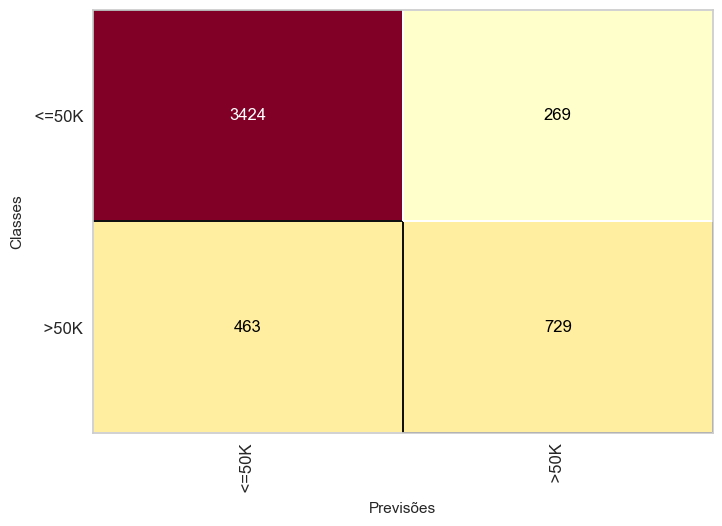

In [8]:
cm = ConfusionMatrix( random_forest )
cm.fit( x_previsores_treinamento, y_classes_treinamento )
cm.score( x_previsores_teste, y_classes_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [9]:
print(classification_report( y_classes_teste, previsao ))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.85      4885

